#**Pre**


In [2]:
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('final_dataset_noise (7).csv')
# data.head()

In [3]:
data = data.drop(labels='filename',axis=1)
data.shape

(786, 20)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

classification_group = data.iloc[:, -1]
convertor = LabelEncoder()
Y = convertor.fit_transform(classification_group)


fit = StandardScaler()
X = fit.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

print(X.shape)
print(Y.shape)


(786, 19)
(786,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [6]:
print(y_test)

[3 3 3 0 0 0 2 2 0 0 3 2 1 3 1 3 1 0 0 2 2 0 1 3 3 0 0 0 0 2 1 1 3 2 2 1 3
 0 0 0 1 3 1 0 3 2 0 0 2 1 1 1 2 1 3 1 1 3 2 2 3 2 3 3 3 2 2 0 0 3 1 3 0 3
 1 0 2 3 2 0 1 2 2 3 0 3 2 2 0 1 3 2 0 3 3 0 3 1 0 3 0 1 1 3 2 3 0 0 3 1 3
 3 1 1 3 1 0 2 3 0 1 1 1 3 1 1 2 3 2 1 2 2 2 3 3 3 0 3 0 0 1 3 0 1 0 1 1 0
 3 3 1 0 3 0 1 3 3 0]


#**Classification by: eXtreme Gradiet Boosting - XGBoost**

In [7]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=24)
model.fit(X_train,y_train,eval_metric='merror')

XGBClassifier(n_estimators=24, objective='multi:softprob')

In [8]:
preds = model.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
target_names = sorted(set(Y))


print(f'Training accuracy: {accuracy_score(y_train,y_pred_train) * 100}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test) * 100}')

print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Training accuracy: 87.42038216560509
Testing accuracy: 79.74683544303798
Training:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       167
           1       0.97      0.85      0.91       122
           2       0.80      0.92      0.85       175
           3       0.84      0.96      0.89       164

    accuracy                           0.87       628
   macro avg       0.89      0.87      0.88       628
weighted avg       0.89      0.87      0.87       628

Testing:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        42
           1       0.94      0.84      0.89        38
           2       0.60      0.83      0.69        30
           3       0.85      0.83      0.84        48

    accuracy                           0.80       158
   macro avg       0.80      0.80      0.79       158
weighted avg       0.82      0.80      0.80       158



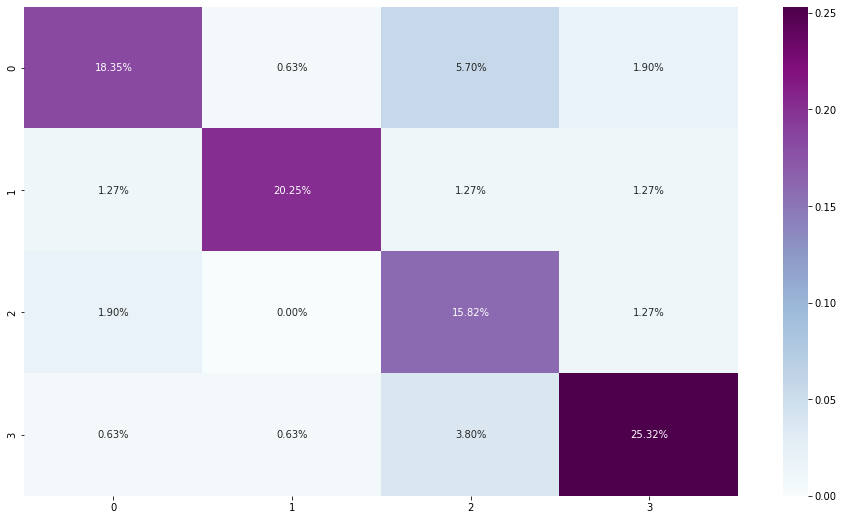

In [10]:
#Confusion matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat/np.sum(conf_mat),cmap="BuPu", fmt='.2%',annot=True, xticklabels = target_names, yticklabels = target_names )

#**Classification by: Convolutional Neural Network**

In [11]:
from tensorflow import keras
from keras.models import Sequential

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(32,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax"),
    
])
print(model.summary())
batch_size = 32
model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 25, 
                     batch_size=batch_size)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5120      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.4739 - accuracy: 0.8924
The test loss is : 0.47387269139289856

The test Accuracy is : 89.2405092716217


In [14]:
import pickle
# pickled_model = pickle.load(open('model.pkl', 'rb'))
# pickle.dump(model, pickled_model)
# pickled_model.predict(X_test)


with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)
lr.predict(X_test)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5  

array([[8.8544434e-01, 2.3902378e-05, 8.2162477e-04, ..., 2.3952680e-08,
        2.2439991e-07, 1.6483802e-06],
       [1.1389148e-05, 5.7622731e-08, 7.5263495e-05, ..., 2.4967042e-11,
        3.0512717e-10, 6.6701373e-09],
       [1.9265513e-04, 7.1804214e-07, 1.2600825e-03, ..., 9.7497710e-10,
        1.1036338e-08, 1.4700053e-07],
       ...,
       [1.5351870e-03, 4.8941060e-05, 4.7965082e-03, ..., 4.3053592e-07,
        1.7406816e-06, 1.3362947e-05],
       [2.8976274e-04, 1.0686331e-06, 2.5940954e-03, ..., 1.5009047e-09,
        1.7517266e-08, 1.8879932e-07],
       [1.0000000e+00, 3.5648984e-11, 2.4147837e-10, ..., 5.8405410e-16,
        1.4722710e-12, 6.0473158e-14]], dtype=float32)

#**Classification by: Random Forest Classifier**

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42, n_estimators=16, max_leaf_nodes=16, n_jobs=-1)
forest.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=16, n_estimators=16, n_jobs=-1,
                       random_state=42)

In [16]:
y_pred_train2 = forest.predict(X_train)
y_pred_test2 = forest.predict(X_test)
target_names2 = sorted(set(Y))


print(f'Training accuracy: {accuracy_score(y_train,y_pred_train2)}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test2)}')

print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Training accuracy: 0.8837579617834395
Testing accuracy: 0.7658227848101266
Training:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       167
           1       0.97      0.85      0.91       122
           2       0.80      0.92      0.85       175
           3       0.84      0.96      0.89       164

    accuracy                           0.87       628
   macro avg       0.89      0.87      0.88       628
weighted avg       0.89      0.87      0.87       628

Testing:
               precision    recall  f1-score   support

           0       0.83      0.69      0.75        42
           1       0.94      0.84      0.89        38
           2       0.60      0.83      0.69        30
           3       0.85      0.83      0.84        48

    accuracy                           0.80       158
   macro avg       0.80      0.80      0.79       158
weighted avg       0.82      0.80      0.80       158



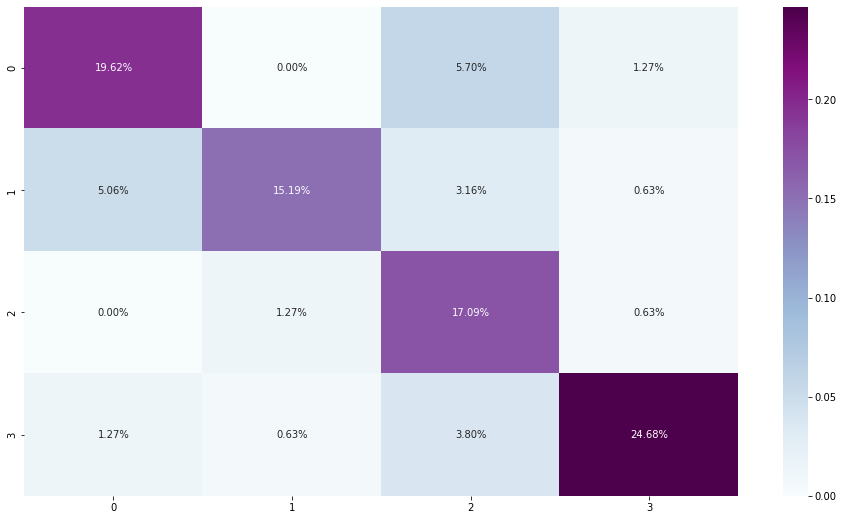

In [17]:
#Confusion matrix
conf_mat2 = confusion_matrix(y_test, y_pred_test2)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat2/np.sum(conf_mat2),cmap="BuPu", fmt='.2%',annot=True, xticklabels = target_names, yticklabels = target_names )

#**ROC CURVE**

In [18]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize

pred_prob = forest.predict_proba(X_test)
y_bin = label_binarize(y_test,classes=np.unique(y_test))

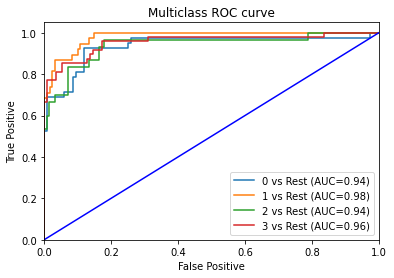

In [19]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 4
classes = [i for i in range(4)]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_bin[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], linestyle='-', label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')
plt.show()


#**Feature Importance**

In [20]:
forest.feature_importances_
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 8.9 MB/s eta 0:00:00


In [21]:

import shap
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)

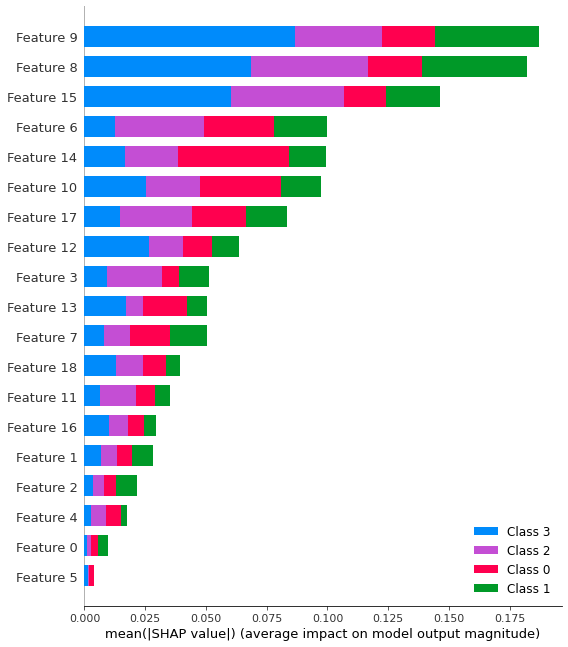

In [22]:
shap.summary_plot(shap_values, X_test, plot_type="bar")